In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
print('Iris data shape:', X.shape)
print('Iris label shape:', y.shape)

Iris data shape: (150, 2)
Iris label shape: (150,)


In [3]:
# filtering the dataset to keep only classes of interest
# extract unique labels
print(np.unique(y))

# 0 => Setosa
# 1 => Versicolor
classes_of_interest = [0, 1]

idx_of_interest = y==classes_of_interest[0]
idx_of_interest = np.logical_or(idx_of_interest, y==classes_of_interest[1])

X = X[idx_of_interest]
y = y[idx_of_interest]

print('Filtered Iris data shape:', X.shape)
print('Filtered Iris label shape:', y.shape)

[0 1 2]
Filtered Iris data shape: (100, 2)
Filtered Iris label shape: (100,)


In [4]:
# for displaying purposes
f1_min, f1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5  # min, max from feat 1 (with some margin)
f2_min, f2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5  # min, max from feat 2 (with some margin)

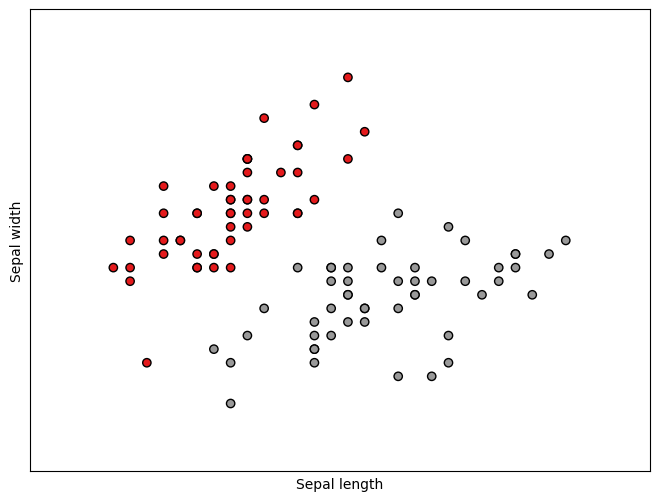

In [5]:
plt.figure(1, figsize=(8, 6))

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(f1_min, f1_max)
plt.ylim(f2_min, f2_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2, stratify=y)

standardize = True
if standardize:
  # standardization parameters
  feat_mean = np.mean(X_tr, axis=0)
  feat_stdev = np.std(X_tr, axis=0)

  # standardization
  X_tr = (X_tr-feat_mean)/feat_stdev
  X_ts = (X_ts-feat_mean)/feat_stdev

  # for displaying purposes
  X = (X-feat_mean)/feat_stdev

In [7]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(2,), activation=keras.activations.hard_sigmoid))

opt = keras.optimizers.SGD(learning_rate = 0.1, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_tr, y_tr, epochs=10, batch_size=10, verbose=1, shuffle=True, validation_split=0.2)

Epoch 1/10
7/7 [==============================] - 2s 135ms/step - loss: 0.9110 - accuracy: 0.2500 - val_loss: 0.5529 - val_accuracy: 0.8750
Epoch 2/10
7/7 [==============================] - 0s 20ms/step - loss: 0.3099 - accuracy: 1.0000 - val_loss: 0.1586 - val_accuracy: 0.9375
Epoch 3/10
7/7 [==============================] - 0s 16ms/step - loss: 0.0757 - accuracy: 1.0000 - val_loss: 0.1035 - val_accuracy: 0.9375
Epoch 4/10
7/7 [==============================] - 0s 39ms/step - loss: 0.0352 - accuracy: 1.0000 - val_loss: 0.0935 - val_accuracy: 0.9375
Epoch 5/10
7/7 [==============================] - 0s 44ms/step - loss: 0.0217 - accuracy: 1.0000 - val_loss: 0.0925 - val_accuracy: 0.9375
Epoch 6/10
7/7 [==============================] - 0s 29ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.0946 - val_accuracy: 0.9375
Epoch 7/10
7/7 [==============================] - 0s 44ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.0967 - val_accuracy: 0.9375
Epoch 8/10
7/7 [==========

In [8]:
_, test_acc = model.evaluate(X_ts, y_ts)
print('Test accuracy: {:.3f}'.format(test_acc))

1/1 [==============================] - 0s 125ms/step - loss: 0.0211 - accuracy: 1.0000
Test accuracy: 1.000


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


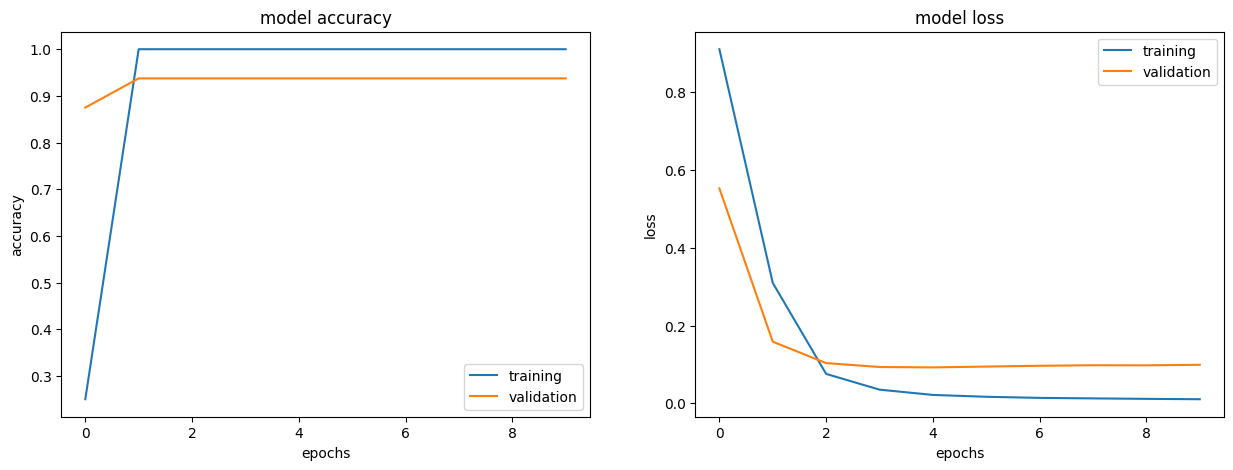

In [9]:
# list all data in history
print(history.history.keys())

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history['accuracy'], label='training')
ax[0].plot(history.history['val_accuracy'], label='validation')
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epochs')
ax[0].legend()
ax[1].plot(history.history['loss'], label='training')
ax[1].plot(history.history['val_loss'], label='validation')
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epochs')
ax[1].legend()
plt.show()

In [10]:
weights = model.get_weights()
print(weights)
w1, w2 = weights[0][0, 0], weights[0][1, 0]
b = weights[1][0]
print(w1, w2, b)

[array([[ 3.8144126],
       [-3.746699 ]], dtype=float32), array([0.7362222], dtype=float32)]
3.8144126 -3.746699 0.7362222


[-1.7660691   2.43515255]
[-1.6014881   2.67566156]


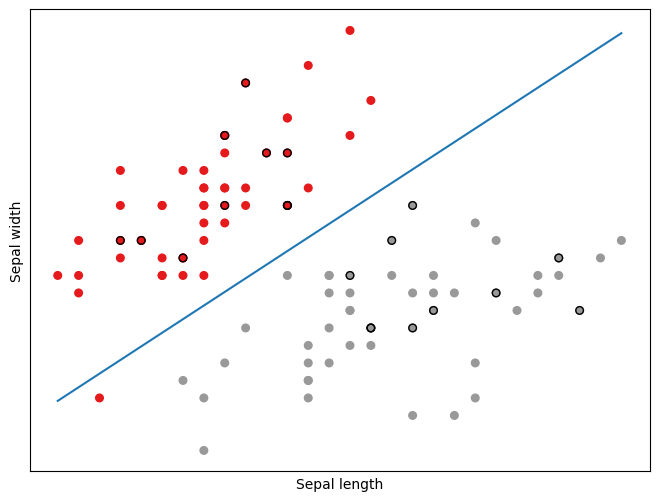

In [11]:
# displaying the linear discriminant
plt.figure(2, figsize=(8, 6))

f1 = np.array([np.min(X[:,0], axis=0), np.max(X[:,0], axis=0)])
print(f1)
f2 = -(b+f1*w1)/w2
print(f2)
plt.plot(f1, f2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, s=30)  #, edgecolor="k")
plt.scatter(X_ts[:, 0], X_ts[:, 1], s=30, facecolors='none', edgecolors='k')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xticks(())
plt.yticks(())

plt.show()